In [22]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [30]:
DATADIR = r"C:/Users/eilha/Desktop/DIVP Assignment/CBIR-Assignment/DATASETJPG/"
CATEGORIES = ['camel', 'classic', 'comma', 'deer', 'device0', 'device3','device4','device8','dog', 'face', 'fish', 'flatfish',
          'fountain', 'frog', 'guitar', 'hammer', 'hat', 'horse', 'horseshoe', 'phone']


## Plotting stuff

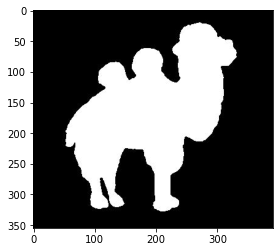

In [31]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap = "gray")
        plt.show
        break
    break
        

In [32]:
print(img_array.shape)

(355, 391)


## Normalizing the shapes

<function matplotlib.pyplot.show(close=None, block=None)>

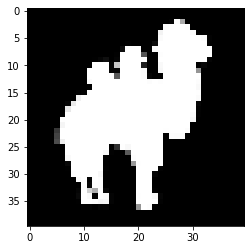

In [33]:
# trying a few shapes 
IMG_SIZE = 40

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show

## Creating training data

In [39]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category) #creating class numbers
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) #resizing
                training_data.append([new_array, class_num])
                
            except Exception as e:
                pass

           
        
        
create_training_data()
                
    

In [40]:
print(len(training_data))

400


In [41]:
import random
random.shuffle(training_data)

In [42]:
for sample in training_data:
    print(sample[1])

0
12
2
13
18
0
11
7
9
12
11
6
12
11
3
2
17
16
1
6
5
11
11
17
2
16
6
18
12
12
2
14
17
7
10
4
1
16
9
11
3
10
6
12
17
13
0
6
16
15
8
5
0
4
14
4
13
0
18
12
8
4
3
0
1
11
17
6
4
16
17
7
2
9
12
12
10
9
5
7
12
9
7
5
0
9
7
12
8
13
2
11
18
3
5
17
16
14
17
13
17
0
3
1
1
15
13
3
2
18
18
10
19
7
11
7
13
10
7
6
13
8
14
8
4
18
1
10
14
5
18
19
19
11
1
6
10
11
7
15
7
2
8
18
14
19
4
3
17
4
16
19
14
10
8
2
13
5
7
3
4
8
18
18
15
14
0
10
8
13
11
3
4
9
3
11
18
15
6
9
19
4
19
3
14
6
13
4
9
10
1
3
10
19
10
0
15
13
2
17
11
2
8
13
18
17
1
2
1
9
6
2
4
9
9
18
16
10
16
5
19
15
18
19
5
15
6
14
2
8
7
16
3
5
5
7
7
7
5
1
13
2
17
8
11
1
4
16
9
12
5
12
11
15
15
16
19
2
10
1
7
4
1
10
9
14
2
8
15
0
1
6
3
0
13
17
0
8
5
12
15
5
1
12
19
4
16
15
9
15
19
4
17
16
19
9
3
19
5
9
11
3
11
14
13
12
12
19
19
15
2
16
1
8
14
19
11
4
13
9
16
0
10
16
1
5
14
18
8
18
17
2
7
5
18
3
7
17
3
6
6
6
12
4
14
19
6
14
1
1
14
8
3
3
0
2
5
14
9
11
6
19
8
10
13
12
5
16
10
9
7
0
0
15
18
15
8
16
4
17
13
0
8
10
13
17
14
16
15
12
14
6
15
0
10
6
18
0
15
17


## X and y designation

In [43]:
X = []
y = []


In [44]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # ( 50 x 50 x 1)  1 = grayscale


## Saving using pickle

In [45]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

In [46]:
# loading it back in
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [51]:
X[1] , y[1]

(array([[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        ...,
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],
 
        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]], dtype=uint8),
 12)

## Building the ConvNetwork

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

In [54]:
# load the pickle back
X  = pickle.load(open("X.pickle", "rb"))
y  = pickle.load(open("y.pickle", "rb"))

In [86]:
y.shape

(400, 40, 40, 1)

In [129]:
X.shape

(400, 40, 40, 1)

In [138]:
y.shape

(400, 40, 40, 1)

In [133]:
# Normalizing the data
# min 0 max 255 

X = X/255.0



In [135]:
# building sequential()

model = Sequential()
model.add(Conv2D(64, kernel_size = (3,3) , activation = 'relu'))

model.add(MaxPooling2D(pool_size = (1,1)))

model.add(Conv2D(64, kernel_size = (3,3) , activation = 'relu')) #skips -1  (50x50x1) -> (50,50,1)
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (1,1)))

model.add(Flatten())  # conv2d is 2d , dense needs 1d -> flatten

model.add(Dense(128, input_shape = X.shape[1:], activation = 'relu'))

model.add(Dense(40, activation = 'softmax'))


model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "adam", 
             metrics = ['accuracy'])



In [137]:
model.fit(X, y, epochs = 5, validation_split = 0.1)

Epoch 1/5


InvalidArgumentError:  logits and labels must have the same first dimension, got logits shape [32,40] and labels shape [51200]
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-137-291fb08d4be8>:1) ]] [Op:__inference_train_function_25903]

Function call stack:
train_function


In [128]:
# fitting model
model.fit(X, y, epochs=100, batch_size = 32, validation_split = 0.2, verbose = 1)

Epoch 1/100


ValueError: in user code:

    C:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:748 train_step
        loss = self.compiled_loss(
    C:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Anaconda\lib\site-packages\tensorflow\python\keras\losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    C:\Anaconda\lib\site-packages\tensorflow\python\keras\losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Anaconda\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Anaconda\lib\site-packages\tensorflow\python\keras\losses.py:1566 sparse_categorical_crossentropy
        return K.sparse_categorical_crossentropy(
    C:\Anaconda\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Anaconda\lib\site-packages\tensorflow\python\keras\backend.py:4782 sparse_categorical_crossentropy
        res = nn.sparse_softmax_cross_entropy_with_logits_v2(
    C:\Anaconda\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Anaconda\lib\site-packages\tensorflow\python\ops\nn_ops.py:4175 sparse_softmax_cross_entropy_with_logits_v2
        return sparse_softmax_cross_entropy_with_logits(
    C:\Anaconda\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Anaconda\lib\site-packages\tensorflow\python\ops\nn_ops.py:4088 sparse_softmax_cross_entropy_with_logits
        raise ValueError("Shape mismatch: The shape of labels (received %s) "

    ValueError: Shape mismatch: The shape of labels (received (51200,)) should equal the shape of logits except for the last dimension (received (32, 40)).
